In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [2]:
cs2_odds_df = pd.read_pickle("dataframes/polished_mainframe.pkl")
cs2_odds_df = cs2_odds_df.astype(float)

# # remove outliers
# cs2_odds_df = cs2_odds_df[np.abs(stats.zscore(cs2_odds_df['total_kills'])) < 3]

# split off results before normalization
cs2_odds_df_results = cs2_odds_df['total_kills']

# Split results between training, dev, and test
cs2_odds_df_training_results = cs2_odds_df_results.head((len(cs2_odds_df.index) * 7) // 10)
cs2_odds_df_dev_results = cs2_odds_df_results.iloc[((len(cs2_odds_df.index) * 7) // 10):((len(cs2_odds_df.index) * 9) // 10) - 1]
cs2_odds_df_test_results = cs2_odds_df_results.tail((len(cs2_odds_df.index) * 1) // 10)

# Full list of columns in order of importance
columns_ranked = [
    "rating", "odds", "rounds_with_a_kill", "opponent_avg_rounds_won_in_losses",
    "avg_rounds_lost_in_wins", "opponent_avg_rounds_lost_in_wins", "avg_rounds_won_in_losses",
    "damage_per_round", "damage_per_round_win", "win_percentage_after_opening_kill",
    "assisted_kills_percentage", "one_on_one_win_percentage", "last_alive_percentage",
    "opening_kills_per_round", "damage_per_kill", "opening_success", "support_attacks_per_round",
    "trade_kills_percentage", "support_rounds", "opening_deaths_traded_percentage",
    "opponent_rank", "team_rank", "rounds_with_a_multikill", "assists_per_round",
    "traded_deaths_percentage", "clutch_points_per_round", "kills_per_round_win",
    "opening_deaths_per_round", "opening_attempts", "trade_kills_per_round",
    "saved_teammate_per_round", "saved_by_teammate_per_round", "kills_per_round",
    "traded_deaths_per_round"
]

# Select only the top 15
top_15_columns = columns_ranked[:15]

# Assume df is your original DataFrame
cs2_odds_df = cs2_odds_df[top_15_columns]

In [3]:
# Normalize data before spltting off
cs2_odds_df=(cs2_odds_df-cs2_odds_df.min())/(cs2_odds_df.max()-cs2_odds_df.min())

print(cs2_odds_df)

# Split data between training, dev, and test
cs2_odds_df_training = cs2_odds_df.head((len(cs2_odds_df.index) * 7) // 10)
cs2_odds_df_dev = cs2_odds_df.iloc[((len(cs2_odds_df.index) * 7) // 10):((len(cs2_odds_df.index) * 9) // 10) - 1]
cs2_odds_df_test = cs2_odds_df.tail((len(cs2_odds_df.index) * 1) // 10)

       rating      odds  rounds_with_a_kill  \
215  0.506667  0.335603            0.595918   
140  0.480000  0.054475            0.546939   
182  0.613333  0.105058            0.751020   
66   0.386667  0.058366            0.383673   
43   0.426667  0.000000            0.583673   
..        ...       ...                 ...   
155  0.533333  0.361868            0.555102   
41   0.480000  0.426070            0.502041   
170  0.573333  0.027237            0.624490   
168  0.440000  0.054475            0.457143   
128  0.613333  0.012646            0.575510   

     opponent_avg_rounds_won_in_losses  avg_rounds_lost_in_wins  \
215                           0.666667                 0.675359   
140                           0.862416                 0.438070   
182                           0.615213                 0.543677   
66                            0.638702                 0.658409   
43                            0.373602                 0.556714   
..                               

In [4]:
# Split off results
cs2_odds_df_training_results = cs2_odds_df_training_results.values.ravel()
cs2_odds_df_dev_results = cs2_odds_df_dev_results.values.ravel()
cs2_odds_df_test_results = cs2_odds_df_test_results.values.ravel()

In [5]:
# Our Linear Regression Model RMSE for the dev set
reg = LinearRegression().fit(cs2_odds_df_training, cs2_odds_df_training_results)
score = reg.score(cs2_odds_df_dev, cs2_odds_df_dev_results)
print(f'Linear Regression dev score: {score}')
y_predicted = reg.predict(cs2_odds_df_dev)
rmse = np.sqrt(mean_squared_error(cs2_odds_df_dev_results, y_predicted))
print(f'Linear regression dev RMSE: {rmse}')

Linear Regression dev score: 0.0883268432964045
Linear regression dev RMSE: 8.024777661943933


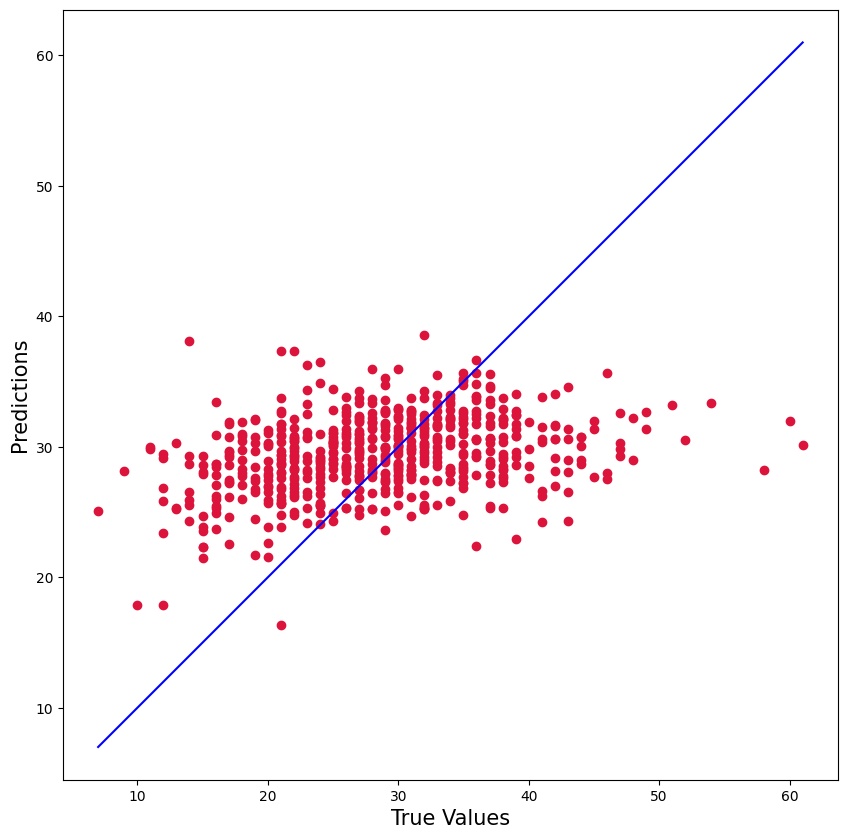

In [6]:
# Our predicted vs true values plot for the basic stats
plt.figure(figsize=(10,10))
plt.scatter(cs2_odds_df_dev_results, y_predicted, c='crimson')
p1 = max(max(y_predicted), max(cs2_odds_df_dev_results))
p2 = min(min(y_predicted), min(cs2_odds_df_dev_results))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [7]:
# Our Linear Regression Model RMSE for the test set
reg = LinearRegression().fit(cs2_odds_df_training, cs2_odds_df_training_results)
score = reg.score(cs2_odds_df_test, cs2_odds_df_test_results)
print(f'Linear regression test score: {score}')
y_predicted = reg.predict(cs2_odds_df_test)
rmse = np.sqrt(mean_squared_error(cs2_odds_df_test_results, y_predicted))
print(f'Linear regression test RMSE: {rmse}')

Linear regression test score: 0.11790100702305417
Linear regression test RMSE: 8.029918055542627


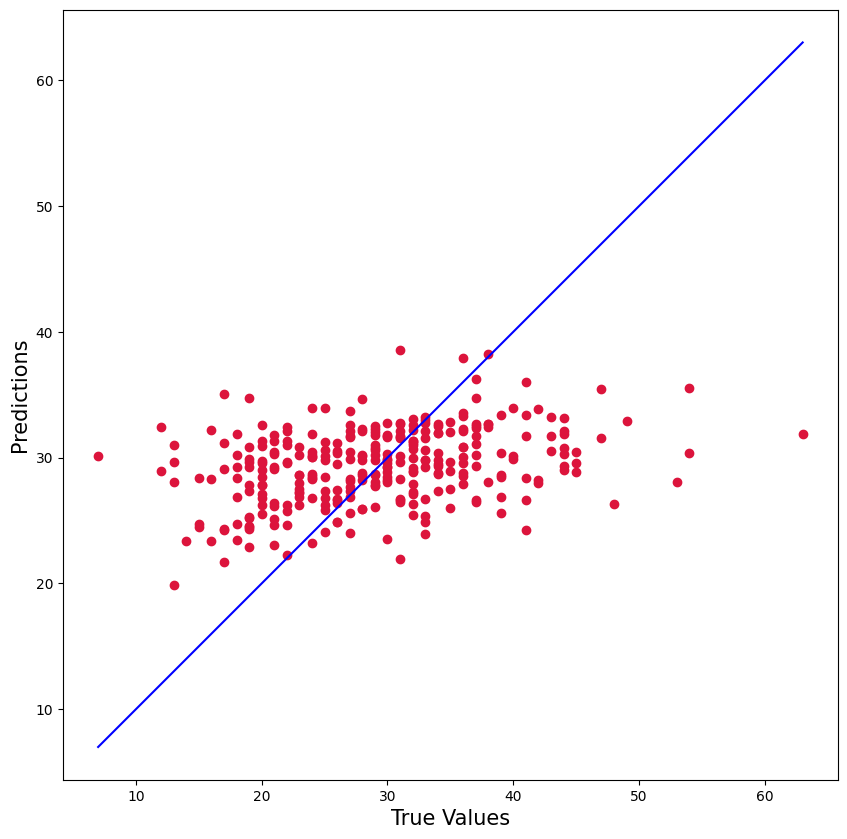

In [8]:
# Our predicted vs true values plot for the full stats
plt.figure(figsize=(10,10))
plt.scatter(cs2_odds_df_test_results, y_predicted, c='crimson')
p1 = max(max(y_predicted), max(cs2_odds_df_test_results))
p2 = min(min(y_predicted), min(cs2_odds_df_test_results))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()